In [3]:
import scanpy as sc 
import os
import scipy as sp
import numpy as np
import pandas as pd

In [4]:
os.getcwd()

'/home/mohammad/Desktop/scnet/notebooks/data_analysis'

In [5]:
os.chdir("../../data/")

#### HCL

In [27]:
bs = 5000
for i in np.arange(start=0, step=bs , stop=len(adata_hcc)):
    e = min(i+bs, len(adata_hcc))
    print(i, e)
    if i ==0 :
        matrix = sp.csr_matrix(adata_hcc.chunk_X(np.arange(i,e)))
    else:
         matrix= sp.vstack((matrix,csr_matrix(adata_hcc.chunk_X(np.arange(i,e)))),format="csr")

0 5000
5000 10000
10000 15000
15000 20000
20000 25000
25000 30000
30000 35000
35000 40000
40000 45000
45000 50000
50000 55000
55000 60000
60000 65000
65000 70000
70000 75000
75000 80000
80000 85000
85000 90000
90000 95000
95000 100000
100000 105000
105000 110000
110000 115000
115000 120000
120000 125000
125000 130000
130000 135000
135000 140000
140000 145000
145000 150000
150000 155000
155000 160000
160000 165000
165000 170000
170000 175000
175000 180000
180000 185000
185000 190000
190000 195000
195000 200000
200000 205000
205000 210000
210000 215000
215000 220000
220000 225000
225000 230000
230000 235000
235000 240000
240000 245000
245000 250000
250000 255000
255000 260000
260000 265000
265000 270000
270000 275000
275000 280000
280000 285000
285000 290000
290000 295000
295000 300000
300000 305000
305000 310000
310000 315000
315000 320000
320000 325000
325000 330000
330000 335000
335000 340000
340000 345000
345000 350000
350000 355000
355000 360000
360000 365000
365000 370000
370000 37

In [7]:
meta_hcl = pd.read_csv("./HCL_Fig1_cell_Info.csv")

In [8]:
adata.obs = meta_hcl

In [11]:
adata.write("./HCL.h5ad")

... storing 'sample' as categorical
... storing 'stage' as categorical
... storing 'batch' as categorical
... storing 'donor' as categorical
... storing 'celltype' as categorical


In [12]:
sc.pp.subsample(adata, fraction=.05)

/home/mohammad/packages/anndata/anndata/_core/anndata.py:110: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [14]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e6)

In [17]:
sc.pp.log1p(adata)

In [18]:
sc.pp.highly_variable_genes(adata, n_top_genes=3000)

In [22]:
adata

AnnData object with n_obs × n_vars = 29996 × 27341 
    obs: 'cellnames', 'sample', 'cluster', 'stage', 'batch', 'donor', 'celltype', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'neighbors', 'umap'
    obsm: 'X_pca'

In [23]:
adata = adata[:,adata.var["highly_variable"]]

In [24]:
adata

View of AnnData object with n_obs × n_vars = 29996 × 3000 
    obs: 'cellnames', 'sample', 'cluster', 'stage', 'batch', 'donor', 'celltype', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'neighbors', 'umap'
    obsm: 'X_pca'

In [ ]:
sc.pp.neighbors(adata)

In [26]:
sc.tl.umap(adata)

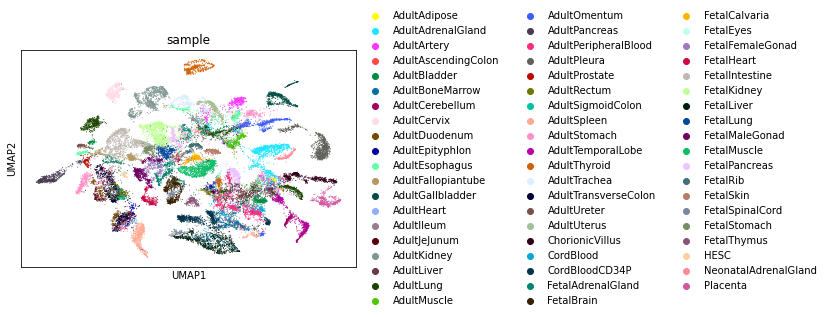

In [33]:
sc.pl.umap(adata, color=["sample"])

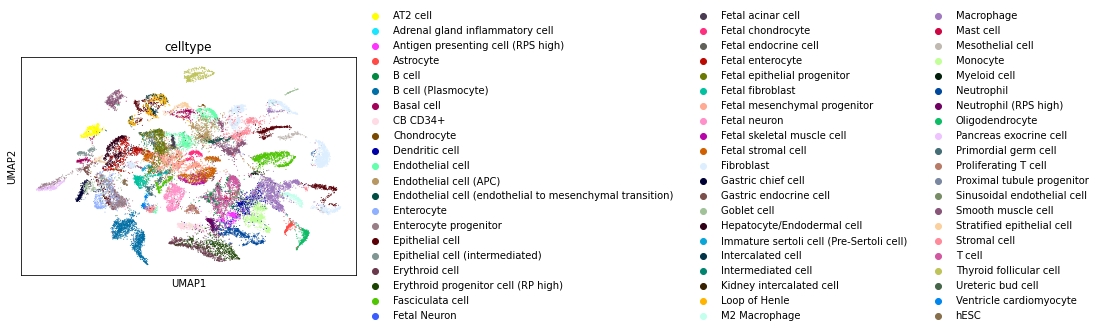

In [34]:
sc.pl.umap(adata, color=["celltype"])

#### MCA

In [42]:
adata_mca = sc.read("./MCA.h5ad", backed="r+")

In [50]:
bs = 5000
for i in np.arange(start=0, step=bs , stop=len(adata_mca)):
    e = min(i+bs, len(adata_mca))
    print(i, e)
    if i ==0 :
        matrix = sp.sparse.csr_matrix(adata_mca.chunk_X(np.arange(i,e)))
    else:
         matrix= sp.sparse.vstack((matrix,csr_matrix(adata_mca.chunk_X(np.arange(i,e)))),format="csr")

0 5000
5000 10000
10000 15000
15000 20000
20000 25000
25000 30000
30000 35000
35000 40000
40000 45000
45000 50000
50000 55000
55000 60000
60000 65000
65000 70000
70000 75000
75000 80000
80000 85000
85000 90000
90000 95000
95000 100000
100000 105000
105000 110000
110000 115000
115000 120000
120000 125000
125000 130000
130000 135000
135000 140000
140000 145000
145000 150000
150000 155000
155000 160000
160000 165000
165000 170000
170000 175000
175000 180000
180000 185000
185000 190000
190000 195000
195000 200000
200000 205000
205000 210000
210000 215000
215000 220000
220000 225000
225000 230000
230000 235000
235000 240000
240000 245000
245000 250000
250000 255000
255000 260000
260000 265000
265000 270000
270000 275000
275000 280000
280000 285000
285000 290000
290000 295000
295000 300000
300000 305000
305000 310000
310000 315000
315000 320000
320000 325000
325000 330000
330000 333778


In [51]:
adata_mca.X = matrix

In [36]:
meta_mca = pd.read_csv("./MCA1.1_cell_info.csv")

In [45]:
adata_mca.obs = meta_mca

In [46]:
adata_mca

AnnData object with n_obs × n_vars = 333778 × 34947 
    obs: 'cellnames', 'cluster', 'tissue', 'stage', 'celltype'

In [47]:
adata_mca.write("MCA.h5ad")

... storing 'tissue' as categorical
... storing 'stage' as categorical
... storing 'celltype' as categorical


In [48]:
sc.pp.subsample(adata_mca, fraction=.05)

/home/mohammad/packages/anndata/anndata/_core/anndata.py:110: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [49]:
sc.pp.normalize_per_cell(adata_mca, counts_per_cell_after=1e6)

In [50]:
sc.pp.log1p(adata_mca)

In [51]:
sc.pp.highly_variable_genes(adata_mca, n_top_genes=3000)

In [53]:
adata_mca = adata_mca[:,adata_mca.var["highly_variable"]]

In [ ]:
sc.pp.neighbors(adata_mca)
sc.tl.umap(adata_mca)

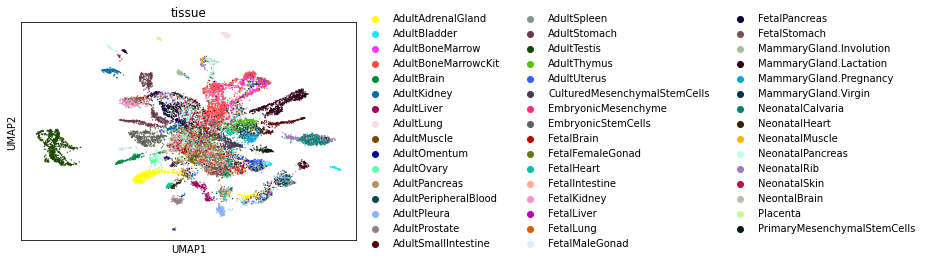

In [56]:
sc.pl.umap(adata_mca, color=["tissue"])

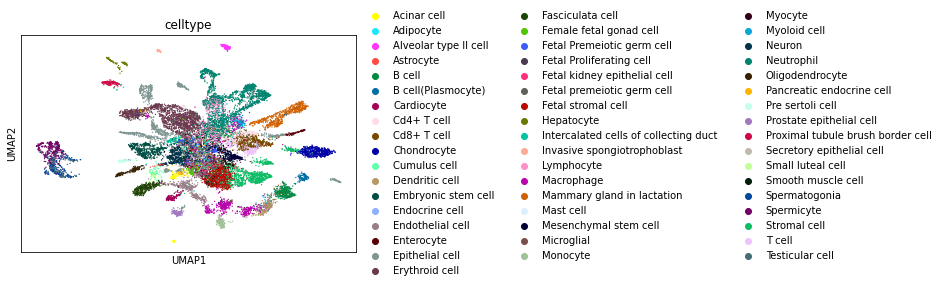

In [57]:
sc.pl.umap(adata_mca, color=["celltype"])